In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feat
import xarray as xr
#import glob
#import netCDF4 as nc
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [291]:
#the conversion formula that goes from modis sinusoidal h,v to lat,lons 
def convert_lat_lon(h,v):    
        ymax,xmin,T, R=10007555,-20015109,1111950,6371007.181
        lat=(ymax-(v+0.5)*T)/R 
        lon=(xmin+(h+0.5)*T)/(np.cos(lat)*R) *180/np.pi
        lat = lat * 180/np.pi
        return lat,lon


In [480]:
#get the values for BurnedCells, LandCells, h, v, year and month, convert hv to latlon
path='/Users/Peter 1/Desktop/Uni/HackathonUOS/data/fire_precip_temp.csv'
BurnedCells=pd.read_csv(path)['BurnedCells'].values
LandCells=pd.read_csv(path)['LandCells'].values
BurnedCells=BurnedCells#/LandCells
year=pd.read_csv(path)['year'].values
month=pd.read_csv(path)['ProductStartDay'].values//30
v=pd.read_csv(path)['v'].values
h=pd.read_csv(path)['h'].values


lat,lon=convert_lat_lon(h,v)

#use lat lon month year as coordinates rather than data
idx = pd.MultiIndex.from_arrays(arrays=[lat,lon,month, year], names=["lat","lon", 'month', 'year'])
s = pd.Series(data=BurnedCells, index=idx)

# use from_series method to get a nice xarray.dataarray
da = xr.DataArray.from_series(s)
da=da.sel(lon=slice(-180,180))
dahist=da.interpolate_na('lon', method='nearest')

In [481]:
#get the values for BurnedCells, LandCells, h, v, year and month, convert hv to latlon
path='/Users/Peter 1/Desktop/Uni/HackathonUOS/data/fire_precip_temp.csv'

LandCells=pd.read_csv(path)['LandCells'].values
year=pd.read_csv(path)['year'].values
month=pd.read_csv(path)['ProductStartDay'].values//30
v=pd.read_csv(path)['v'].values
h=pd.read_csv(path)['h'].values

lat,lon=convert_lat_lon(h,v)

#use lat lon month year as coordinates rather than data
idx = pd.MultiIndex.from_arrays(arrays=[lat,lon,month, year], names=["lat","lon", 'month', 'year'])
s = pd.Series(data=LandCells, index=idx)

# use from_series method to get a nice xarray.dataarray
da = xr.DataArray.from_series(s)
da=da.sel(lon=slice(-180,180))
dahistland=da.interpolate_na('lon', method='nearest')

In [482]:
path='/Users/Peter 1/Desktop/Uni/HackathonUOS/climate_change/datasets/cmip6_ssp585gfdl_firecounts_predicted.csv'
#get the values for BurnedCells, LandCells, h, v, year and month, convert hv to latlon
BurnedCells=pd.read_csv(path)['BurnedCells'].values
#LandCells=pd.read_csv(path)['LandCells'].values
BurnedCells=BurnedCells
year=pd.read_csv(path)['year'].values
month=pd.read_csv(path)['month'].values
v=pd.read_csv(path)['v'].values
h=pd.read_csv(path)['h'].values


lat,lon=convert_lat_lon(h,v)

#use lat lon month year as coordinates rather than data
idx = pd.MultiIndex.from_arrays(arrays=[lat,lon,month, year], names=["lat","lon", 'month', 'year'])
s = pd.Series(data=BurnedCells, index=idx)

# use from_series method to get a nice xarray.dataarray
da = xr.DataArray.from_series(s)
da=da.sel(lon=slice(-180,180))
dapred=da.interpolate_na('lon', method='nearest')

In [493]:
path='/Users/Peter 1/Desktop/Uni/HackathonUOS/climate_change/datasets/cmip6_ssp126gfdl_firecounts_predicted.csv'
#get the values for BurnedCells, LandCells, h, v, year and month, convert hv to latlon
BurnedCells=pd.read_csv(path)['BurnedCells'].values
#LandCells=pd.read_csv(path)['LandCells'].values
BurnedCells=BurnedCells
year=pd.read_csv(path)['year'].values
month=pd.read_csv(path)['month'].values
v=pd.read_csv(path)['v'].values
h=pd.read_csv(path)['h'].values


lat,lon=convert_lat_lon(h,v)

#use lat lon month year as coordinates rather than data
idx = pd.MultiIndex.from_arrays(arrays=[lat,lon,month, year], names=["lat","lon", 'month', 'year'])
s = pd.Series(data=BurnedCells, index=idx)

# use from_series method to get a nice xarray.dataarray
da = xr.DataArray.from_series(s)
da=da.sel(lon=slice(-180,180))
dapredbetter=da.interpolate_na('lon', method='nearest')

In [483]:
dahistland=dahistland.sel(year=2020, month=1)

In [484]:
dahist=dahist/dahistland
dapred=dapred/dahistland


In [494]:
dapredbetter=dapredbetter/dahistland

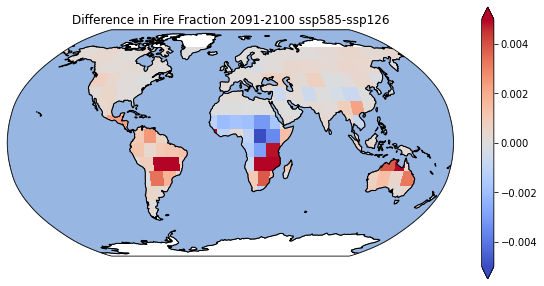

In [498]:
path_difference=dapred-dapredbetter
difflast_10=path_difference.sel(year=slice(2091,2100)).mean(dim='year').mean(dim='month')

f, ax = plt.subplots(1, 1, figsize=(10,5), subplot_kw=dict(projection=ccrs.Robinson()))

difflast_10.plot(ax=ax,transform=ccrs.PlateCarree(), cmap='coolwarm', vmax=0.005)
ax.add_feature(feat.OCEAN, zorder=100, edgecolor='k')
ax.set_global(); ax.coastlines()
plt.title('Difference in Fire Fraction 2091-2100 ssp585-ssp126')
plt.savefig('figures/pathway_difference_ssp585-ssp126gfdl.png', dpi=300)

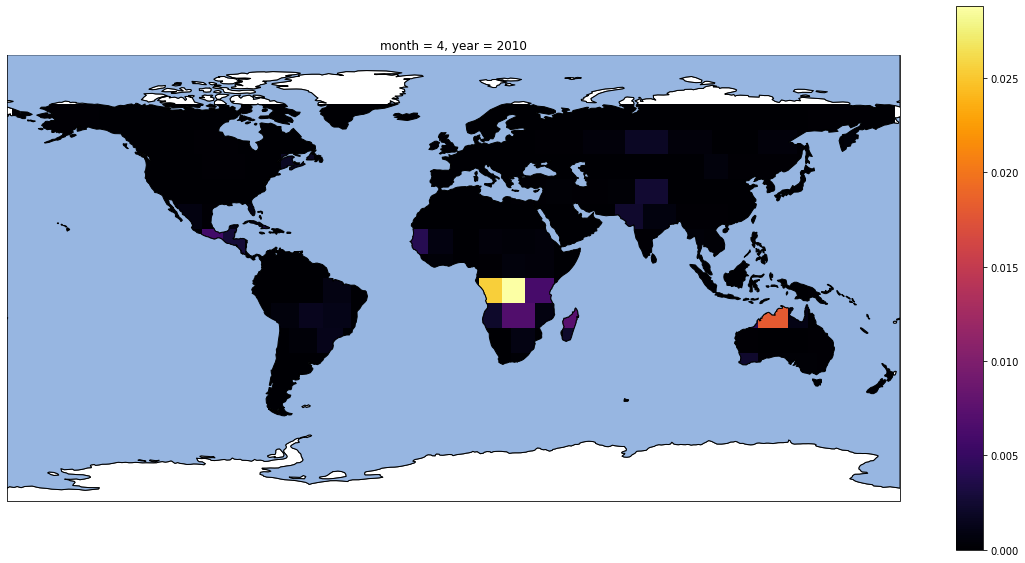

In [485]:
# plot
f, ax = plt.subplots(1, 1, figsize=(20,10), subplot_kw=dict(projection=ccrs.PlateCarree()))

dahist.sel(year=2010).sel(month=4).plot(ax=ax,transform=ccrs.PlateCarree(), cmap='inferno')
ax.add_feature(feat.OCEAN, zorder=100, edgecolor='k')
ax.set_global(); ax.coastlines()

In [486]:
first_10=dahist.sel(year=slice(2001,2010)).mean(dim='year').mean(dim='month')
middle_10=dapred.sel(year=slice(2051,2060)).mean(dim='year').mean(dim='month')
last_10=dapred.sel(year=slice(2091,2100)).mean(dim='year').mean(dim='month')
diff_100yr=last_10-first_10
diff_50yr=middle_10-first_10

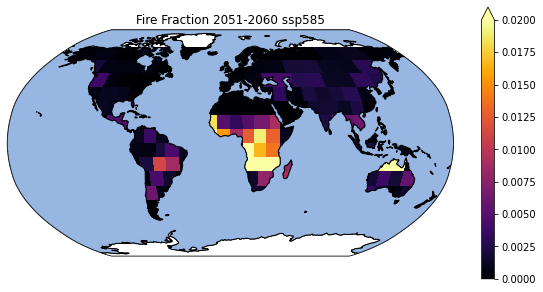

In [487]:
# plot
f, ax = plt.subplots(1, 1, figsize=(10,5), subplot_kw=dict(projection=ccrs.Robinson()))

middle_10.plot(ax=ax,transform=ccrs.PlateCarree(), cmap='inferno', vmax=0.02)
ax.add_feature(feat.OCEAN, zorder=100, edgecolor='k')
ax.set_global(); ax.coastlines()
plt.title('Fire Fraction 2051-2060 ssp585')
plt.savefig('figures/firefrac2050s_ssp585gfdl.png', dpi=300)

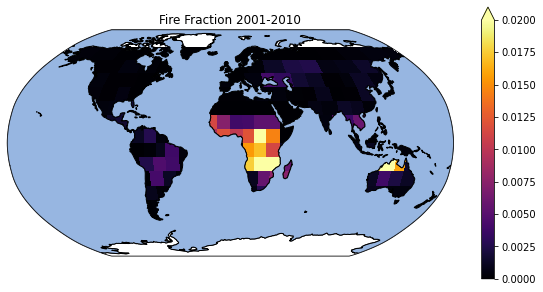

In [476]:
# plot
f, ax = plt.subplots(1, 1, figsize=(10,5), subplot_kw=dict(projection=ccrs.Robinson()))

first_10.plot(ax=ax,transform=ccrs.PlateCarree(), cmap='inferno', vmax=0.02)
ax.add_feature(feat.OCEAN, zorder=100, edgecolor='k')
ax.set_global(); ax.coastlines()
plt.title('Fire Fraction 2001-2010')
plt.savefig('figures/firefrac2010s.png', dpi=300)

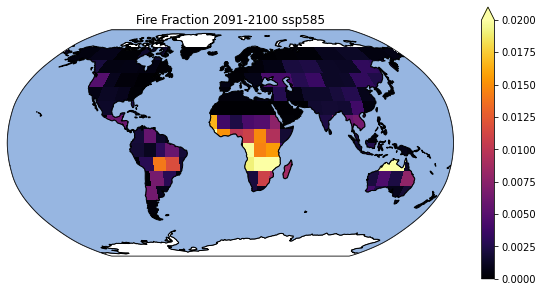

In [488]:
# plot
f, ax = plt.subplots(1, 1, figsize=(10,5), subplot_kw=dict(projection=ccrs.Robinson()))

last_10.plot(ax=ax,transform=ccrs.PlateCarree(), cmap='inferno', vmax=0.02)
ax.add_feature(feat.OCEAN, zorder=100, edgecolor='k')
ax.set_global(); ax.coastlines()
plt.title('Fire Fraction 2091-2100 ssp585')
plt.savefig('figures/firefrac2090s_ssp585gfdl.png', dpi=300)

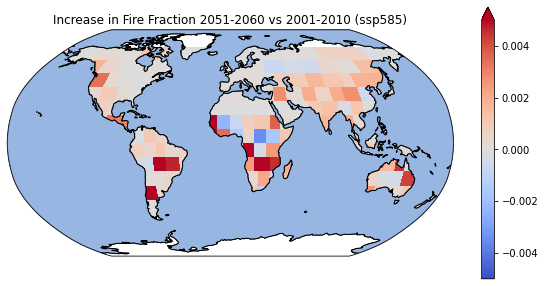

In [489]:
# plot
f, ax = plt.subplots(1, 1, figsize=(10,5), subplot_kw=dict(projection=ccrs.Robinson()))

diff_50yr.plot(ax=ax,transform=ccrs.PlateCarree(), cmap='coolwarm', vmax=0.005)
ax.add_feature(feat.OCEAN, zorder=100, edgecolor='k')
ax.set_global(); ax.coastlines()
plt.title('Increase in Fire Fraction 2051-2060 vs 2001-2010 (ssp585)')
plt.savefig('figures/firefrac2050s_vs2010s_ssp585gfdl.png', dpi=300)

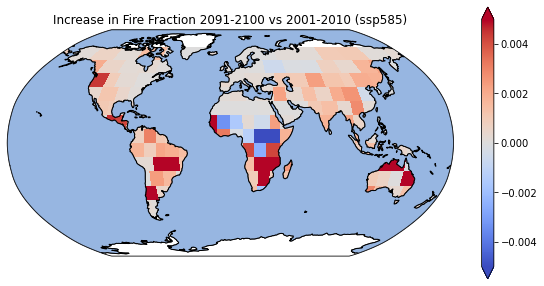

In [492]:
# plot
f, ax = plt.subplots(1, 1, figsize=(10,5), subplot_kw=dict(projection=ccrs.Robinson()))

diff_100yr.plot(ax=ax,transform=ccrs.PlateCarree(), cmap='coolwarm', vmax=0.005)
ax.add_feature(feat.OCEAN, zorder=100, edgecolor='k')
ax.set_global(); ax.coastlines()
plt.title('Increase in Fire Fraction 2091-2100 vs 2001-2010 (ssp585)')
plt.savefig('figures/firefrac2090s_vs2010s_ssp585gfdl.png', dpi=300)